In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv("HumanTraffickingDataset - Sheet1.csv")

In [75]:
data.head()

,url,Origin,Destination,Number of People,Age,Male Victim,Female Victim,Category,Date,City
0,https://www.ndtv.com/telangana-news/hyderabad-...,india,Oman,1.0,NaN,NaN,1.0,labour,21/02/2018,NaN
1,https://www.ndtv.com/hyderabad-news/ex-congres...,india,usa,3.0,NaN,NaN,NaN,NaN,11/09/2018,NaN
2,https://www.ndtv.com/delhi-news/woman-arrested...,india,NaN,1.0,NaN,NaN,NaN,employement,NaN,NaN
3,https://www.ndtv.com/delhi-news/27-trafficked-...,india,NaN,16.0,NaN,5,6.0,employement,NaN,NaN
4,https://www.bbc.com/news/uk-england-derbyshire...,UK,UK,NaN,NaN,NaN,NaN,prostitution,14/03/2019,NaN


In [76]:
data.columns

Index(['url', 'Origin', 'Destination', 'Number of People', 'Age',
       'Male Victim', 'Female Victim', 'Category', 'Date', 'City'],
      dtype='object')

In [77]:
for column in ['Origin', 'Destination', 'Category', 'City', 'url']:
    data[column] = data[column].fillna('NA')
    data[column] = [str(i).lower() for i in data[column]]

In [78]:
data.head()

,url,Origin,Destination,Number of People,Age,Male Victim,Female Victim,Category,Date,City
0,https://www.ndtv.com/telangana-news/hyderabad-...,india,oman,1.0,NaN,NaN,1.0,labour,21/02/2018,na
1,https://www.ndtv.com/hyderabad-news/ex-congres...,india,usa,3.0,NaN,NaN,NaN,na,11/09/2018,na
2,https://www.ndtv.com/delhi-news/woman-arrested...,india,na,1.0,NaN,NaN,NaN,employement,NaN,na
3,https://www.ndtv.com/delhi-news/27-trafficked-...,india,na,16.0,NaN,5,6.0,employement,NaN,na
4,https://www.bbc.com/news/uk-england-derbyshire...,uk,uk,NaN,NaN,NaN,NaN,prostitution,14/03/2019,na


In [79]:
np.unique(data['Origin'])
data['Number of People'] = data['Number of People'].fillna(0)
data['Male Victim'] = data['Male Victim'].fillna(0)
data['Female Victim'] = data['Female Victim'].fillna(0)

In [80]:
data['Number of People'] = data['Number of People'].apply(lambda x: int(x))

Text(0, 0.5, 'Number of People')

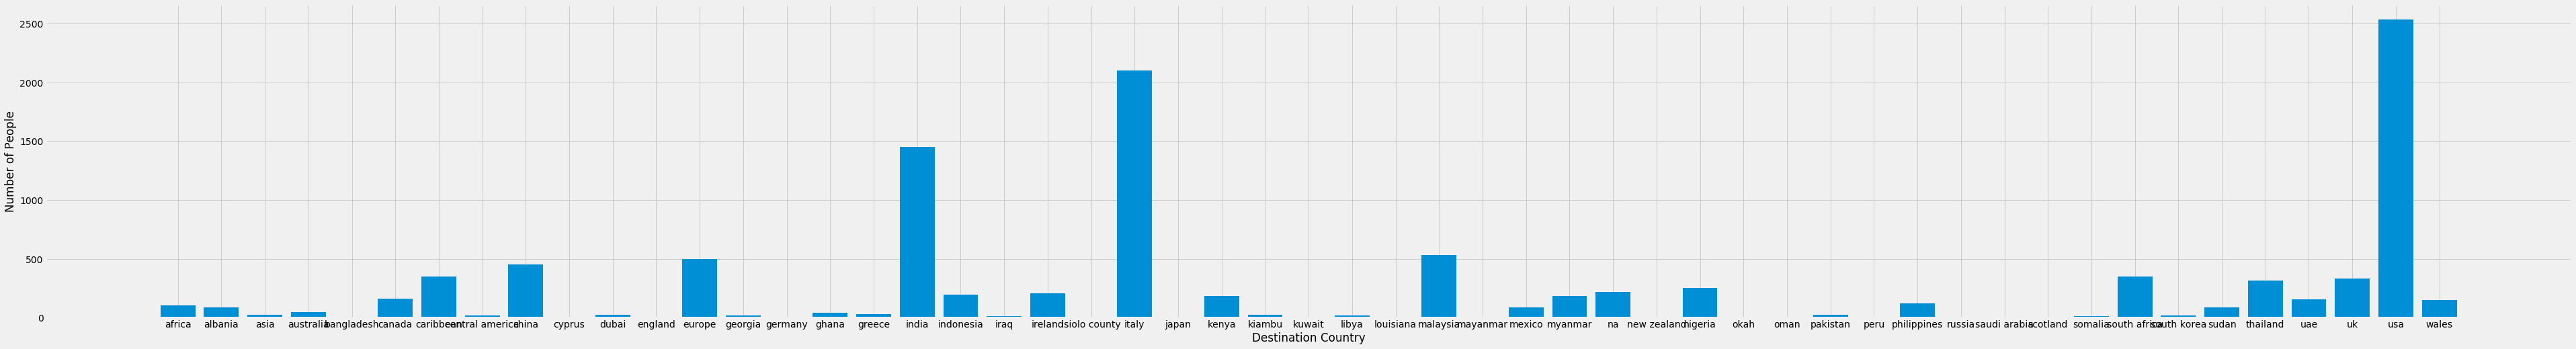

In [81]:
data_destination_grouped = data[['Number of People','Destination']].groupby('Destination')
x = data_destination_grouped.sum()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(60,8))
plt.bar(x.index, x['Number of People'])
plt.xlabel('Destination Country')
plt.ylabel('Number of People')

Text(0, 0.5, 'Number of People')

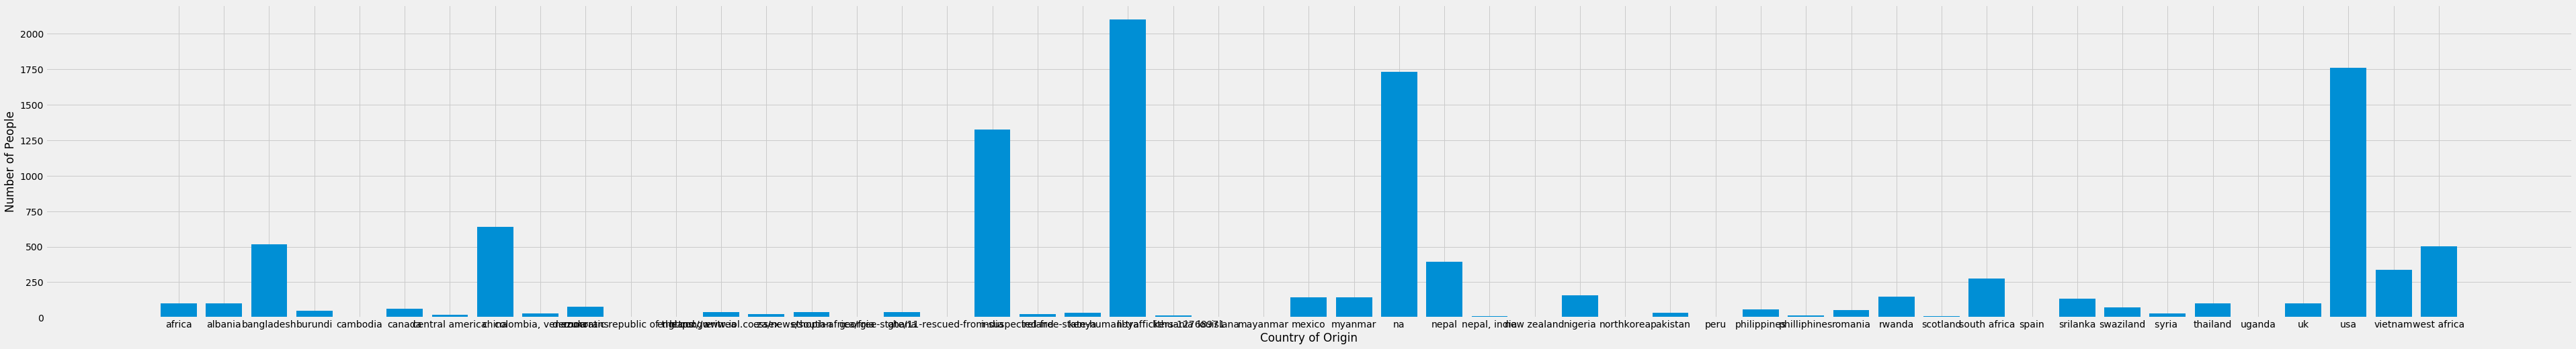

In [82]:
data_destination_grouped = data[['Number of People','Origin']].groupby('Origin')
x = data_destination_grouped.sum()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(60,8))
plt.bar(x.index, x['Number of People'])
plt.xlabel('Country of Origin')
plt.ylabel('Number of People')

In [83]:
data[data['Male Victim']=='-'] = 0
data['Male Victim'] = data['Male Victim'].fillna(0)
data['Male Victim'] =  data['Male Victim'].apply(lambda x : int(x))
data['Number of People'] =  data['Number of People'].apply(lambda x : int(x))
data['Female Victim'] =  data['Female Victim'].apply(lambda x : int(x))

In [84]:
data.head()

,url,Origin,Destination,Number of People,Age,Male Victim,Female Victim,Category,Date,City
0,https://www.ndtv.com/telangana-news/hyderabad-...,india,oman,1,NaN,0,1,labour,21/02/2018,na
1,https://www.ndtv.com/hyderabad-news/ex-congres...,india,usa,3,NaN,0,0,na,11/09/2018,na
2,https://www.ndtv.com/delhi-news/woman-arrested...,india,na,1,NaN,0,0,employement,NaN,na
3,https://www.ndtv.com/delhi-news/27-trafficked-...,india,na,16,NaN,5,6,employement,NaN,na
4,https://www.bbc.com/news/uk-england-derbyshire...,uk,uk,0,NaN,0,0,prostitution,14/03/2019,na


Destination
0                  0
africa            35
albania            0
asia               0
australia          0
bangladesh         0
canada            93
caribbean          0
china              1
cyprus             9
dubai              6
england            5
europe             0
georgia            0
germany            0
ghana              0
greece             0
india             59
indonesia          0
iraq               0
ireland           82
isiolo county      0
italy              0
japan              0
kenya              9
kiambu             0
kuwait             0
libya             16
louisiana          0
malaysia         117
mayanmar           0
mexico            29
myanmar           32
na                33
new zealand        0
nigeria           79
okah               0
oman               0
pakistan           0
peru               0
philippines       12
russia             1
saudi arabia       0
scotland           0
somalia            0
south africa       0
south korea        0
s

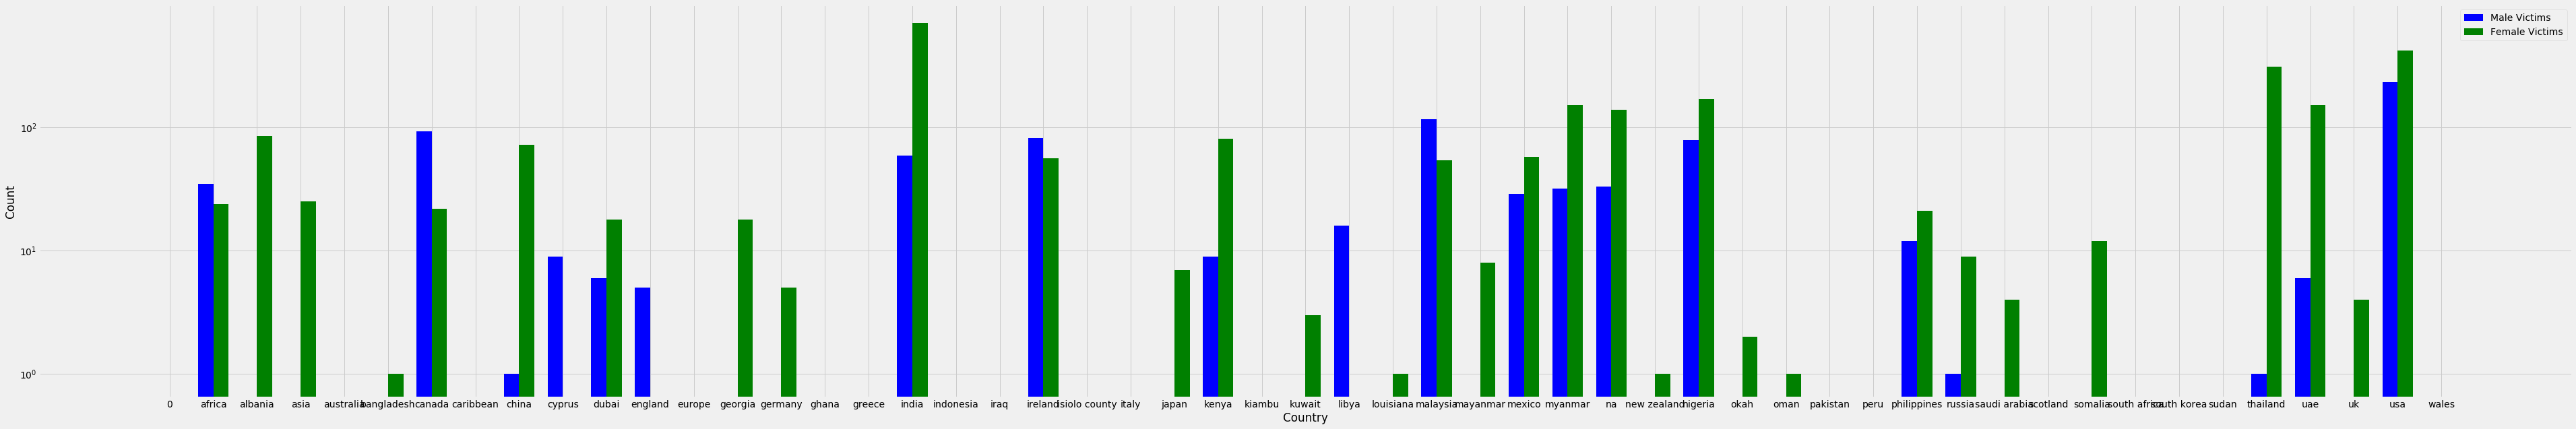

In [85]:
data_male_grouped = data[['Male Victim','Destination']].groupby('Destination')
x = data_male_grouped.sum()
data_female_grouped = data[['Female Victim','Destination']].groupby('Destination')
y = data_female_grouped.sum()
fig = plt.figure(figsize=(60, 10))
ax = plt.subplot(111)
ax.semilogy()
ind = np.arange(len(x.index))  # the x locations for the groups
width = 0.35  # the width of the bars
print(x['Male Victim'])
p1 = ax.bar(ind, x['Male Victim'], width=width, color='b', align='center')
ax.set_xticks(ind + width / 2)
p2 = ax.bar(ind + width, y['Female Victim'], width=width, color='g', align='center')
ax.set_xticklabels(x.index)
ax.legend((p1[0], p2[0]), ('Male Victims', 'Female Victims'))
ax.set_ylabel('Count')
ax.set_xlabel('Country')
plt.show()

In [86]:
data['Category'] = data['Category'].apply(lambda x:"na" if x == 0 else x)

In [87]:
data['Category'].unique()

array(['labour', 'na', 'employement', 'prostitution', 'sexual exploit',
       'organ trafficking', 'sex', 'drugs', 'prositituition',
       'sex trafficking', 'prostiution', 'bonded labour', 'hired worker',
       'smuggling', 'bondage labour', 'child labour', 'slavery',
       'sex trafficker', 'labor', 'human labour', 'begging, prostitution',
       'sex slave', 'trafficking', 'migrant', 'forced labour',
       'sexual exploitation', 'bride', 'cybersex trafficking',
       'sex  trafficking'], dtype=object)

Text(0, 0.5, 'Number of People')

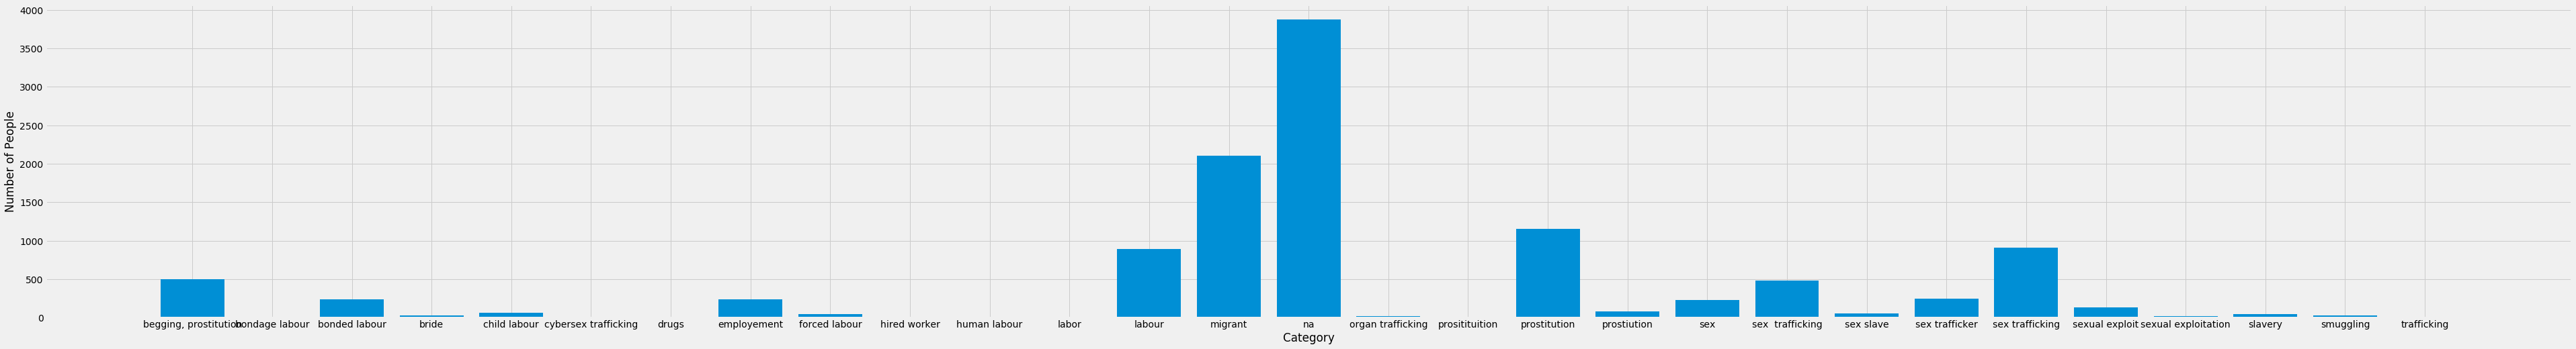

In [88]:
data_destination_grouped = data[['Number of People','Category']].groupby('Category')
x = data_destination_grouped.sum()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(60,8))
plt.bar(x.index, x['Number of People'])
plt.xlabel('Category')
plt.ylabel('Number of People')

In [91]:
data.Category.unique()

array(['labour', 'na', 'employement', 'prostitution', 'sexual exploit',
       'organ trafficking', 'sex', 'drugs', 'prositituition',
       'sex trafficking', 'prostiution', 'bonded labour', 'hired worker',
       'smuggling', 'bondage labour', 'child labour', 'slavery',
       'sex trafficker', 'labor', 'human labour', 'begging, prostitution',
       'sex slave', 'trafficking', 'migrant', 'forced labour',
       'sexual exploitation', 'bride', 'cybersex trafficking',
       'sex  trafficking'], dtype=object)

In [ ]:
sex_types = ['sex', 'sexual exploit', 'sex trafficking', 'sex slave', 'sexual exploitation', 'sex  trafficking']
prostitution = []